# **W207 - Final Project**
# **Incident management process - Predicting SLA conformance**

**Team**:  Dicky Woo, Joy First, Da-Qi Ren



##  **Introduction** ##

### **Project Overview** ###

IT Service Management (ITSM) is an essential corporate function responsible for leveraging innovation to increase value, maximizing user productivity, providing end-to-end tech services, and so much more. Many enterprises have used various ITSM workflow solutions (for example, ServiceNow) to streamline the support process and enhance response times. Service Level Agreement (SLA) is one of the mechanisms used to establish expectations between the consumers (users) and various support groups. 

The project aims to predict whether the IT support ticket will be completed within the required time (SLA). Predicting the volume of the tickets that will be completed within the SLA could be leveraged for a variety of target use cases, including forecasting support pipelines, evaluating the cost of SLA breaches (on both - customer and vendor sides), informing necessary adjustments to meet the requested SLAs, and more.

In this project, we will be using the IT support tickets event log (provided by the UCI Machine Learning repository), with the binary feature - 'made_SLA' as a predicted value.

### **Data Source Overview** ###

Data source: UCI Machine Learning repository ([Link](https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log))

The dataset contains 141,712 events (24,918 incidents) and 36 attributes

Data Dictionary:
1. number: incident identifier (24,918 different values);
2. incident state: eight levels controlling the incident management process transitions from opening until closing the case;
3. active: boolean attribute that shows whether the record is active or closed/canceled;
4. reassignment_count: number of times the incident has the group or the support analysts changed;
5. reopen_count: number of times the incident resolution was rejected by the caller;
6. sys_mod_count: number of incident updates until that moment;
7. made_sla: boolean attribute that shows whether the incident exceeded the target SLA;
8. caller_id: identifier of the user affected;
9. opened_by: identifier of the user who reported the incident;
10. opened_at: incident user opening date and time;
11. sys_created_by: identifier of the user who registered the incident;
12. sys_created_at: incident system creation date and time;
13. sys_updated_by: identifier of the user who updated the incident and generated the current log record;
14. sys_updated_at: incident system update date and time;
15. contact_type: categorical attribute that shows by what means the incident was reported;
16. location: identifier of the location of the place affected;
17. category: first-level description of the affected service;
18. subcategory: second-level description of the affected service (related to the first level description, i.e., to category);
19. u_symptom: description of the user perception about service availability;
20. cmdb_ci: (confirmation item) identifier used to report the affected item (not mandatory);
21. impact: description of the impact caused by the incident (values: 1â€“High; 2â€“Medium; 3â€“Low);
22. urgency: description of the urgency informed by the user for the incident resolution (values: 1â€“High; 2â€“Medium; 3â€“Low);
23. priority: calculated by the system based on 'impact' and 'urgency';
24. assignment_group: identifier of the support group in charge of the incident;
25. assigned_to: identifier of the user in charge of the incident;
26. knowledge: boolean attribute that shows whether a knowledge base document was used to resolve the incident;
27. u_priority_confirmation: boolean attribute that shows whether the priority field has been double-checked;
28. notify: categorical attribute that shows whether notifications were generated for the incident;
29. problem_id: identifier of the problem associated with the incident;
30. rfc: (request for change) identifier of the change request associated with the incident;
31. vendor: identifier of the vendor in charge of the incident;
32. caused_by: identifier of the RFC responsible by the incident;
33. close_code: identifier of the resolution of the incident;
34. resolved_by: identifier of the user who resolved the incident;
35. resolved_at: incident user resolution date and time (dependent variable);
36. closed_at: incident user close date and time (dependent variable)

## **Exploratory Data Analysis** ##

### **EDA Overview** ###

The dataset is composed of real-world enriched event log of the incident management process that is extracted from the platform used by an IT company. All information inside was anonymized by code numbers for privacy reasons. [1] The incident dataset consists of 141,712 incidents recorded from Jan 3rd, 2016 to Aug 31st, 2016. In this dataset, a total 24,985 out of 141,712 cases are closed. We will mainly focus on the closed-case subset of data to study the features and model that predicts the SLA satisfaction. For each detected incident event, incident information includes caller, location, close time, category and others in total 36 columns. Based on this incident dataset for which the end time of the incident is available, i.e. the closed cases, a total 63% (or 15,831) cases met SLA, the rest 33% ( or 9,154) cases failed to meet the SLA. The status of the cases is as the follows. Following qualitative observations described in EDA, we further propose our approach in model creation, training and predictions. 

| Case Status | Number of Cases |
| --- | --- |
|Active                |38716 |
|New                   |36407 |
|Resolved              |25751 |
|Closed                |24985 |
|Awaiting User Info    |14642 |
|Awaiting Vendor       |  707 |
|Awaiting Problem      |  461 |
|Awaiting Evidence     |   38 |
 



### **Import Libraries** ###

In [ ]:
%matplotlib inline

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib import cm
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

# SK-learn libraries for learning.
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# SK-learn libraries for evaluation.
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from scipy.ndimage.filters import gaussian_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow libraries 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
 

np.random.seed(0)
print ("OK")
import tensorflow as tf
print("Tensorflow version", tf.__version__)


OK
Tensorflow version 2.5.0


In [ ]:
# Dicky - please mount the dataset
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Data** ###

In [ ]:
#importing the dataset from the sample_data folder
#dataset = pd.read_csv ("/content/sample_data/incident_event_log.csv")

# importing the datset from mounted drives
dataset = pd.read_csv ("./drive/MyDrive/incident_event_log.csv")
# dataset = pd.read_csv ("./drive/MyDrive/w207_final_project_First_Ren_Woo/incident_event_log.csv")

#data shape and sample
print(f"original dataset shape: {dataset.shape}")
dataset.head ()

original dataset shape: (141712, 36)


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### **Missing Values Analysis** ###

We found MAR (Missing At Random) data,  this means that the missing values in any feature are dependent on the values of other features. Our approach in this baseline version is to ignore the missing values or drop the missing values:

(1) Drop the missing values: If the data is missing at random and the number of missing values in a feature is very high, then that feature should be left out of the analysis. In this work, the 'vender ID', 'rfc', 'caused by' columns will be removed.

(2) Ignore the missing values: Missing data under 10% for an individual case or observation can generally be ignored. 


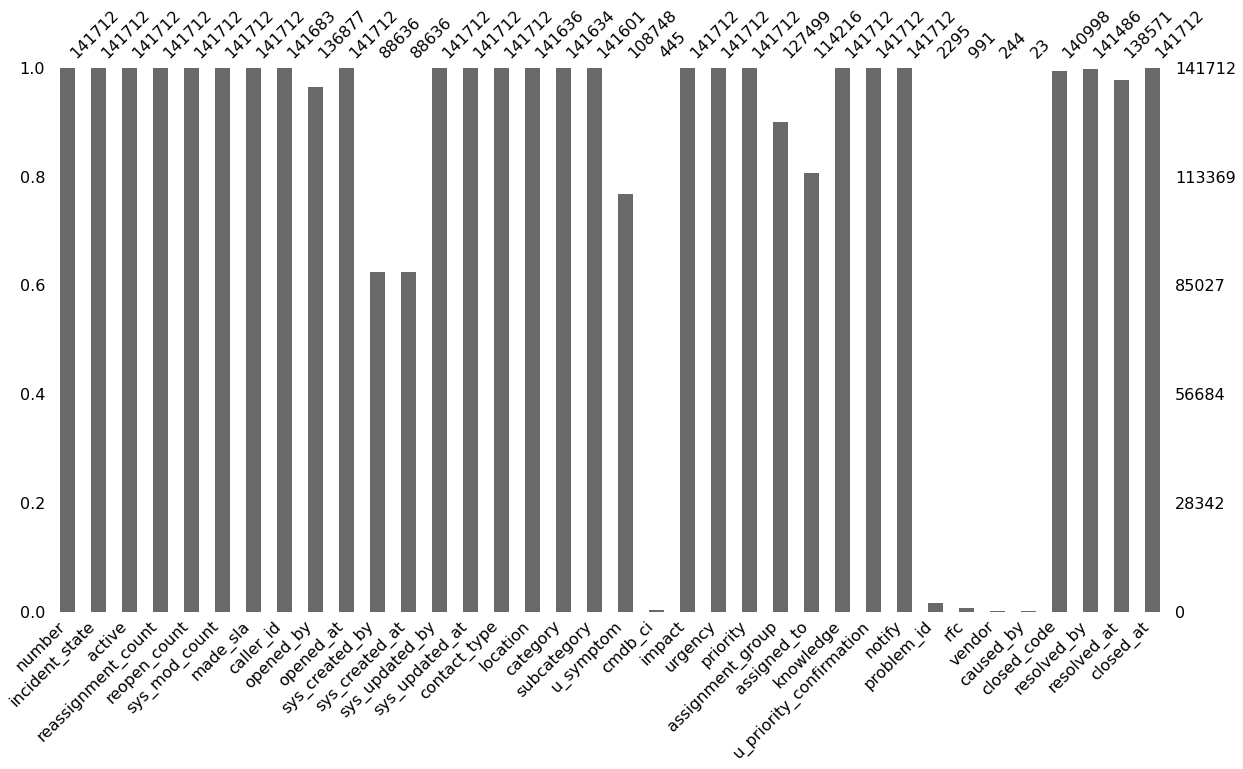

In [ ]:
import missingno as msno
  
# Loading the dataset 
# Visualize missing values as a matrix
#msno.matrix(dataset)
dataeda = dataset
dataeda = dataeda.replace("?", np.nan)

msno.bar(dataeda, figsize=(20,10)  )


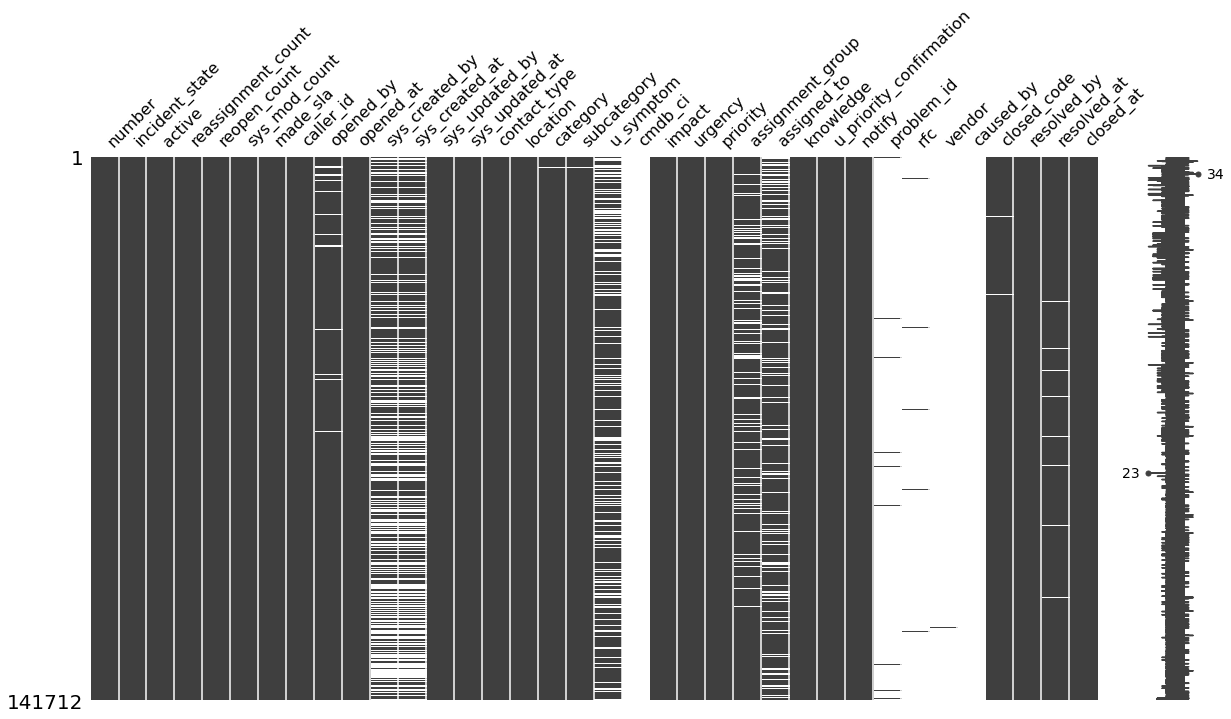

In [ ]:
msno.matrix(dataeda, figsize=(20,10)  )

### **Data Distribution** ###

1. Subset of the total data: In this dataset, a total 24,985 out of 141,712 cases are closed. We will mainly focus on this subset of data to study the ratio of satisfaction on SLA. 

2. Service Level of Agreement: The SLA features ( True or False ) are used as the labels of our model. By plotting the SLA values, we found the labels are imbalanced, i.e., positive sample number is greater than negative sample number. If the SLA true rates should be equal to false rates, and the data plot doesn't reflect this, we need to go ahead and rebalance them. However, for most problems, IT can resolve and meet the SLA on time, rather than failing to resolve the problem or failing to meet the SLA. Which means the imbalance reflects the base rate of our classes, we should go with the original imbalanced data.






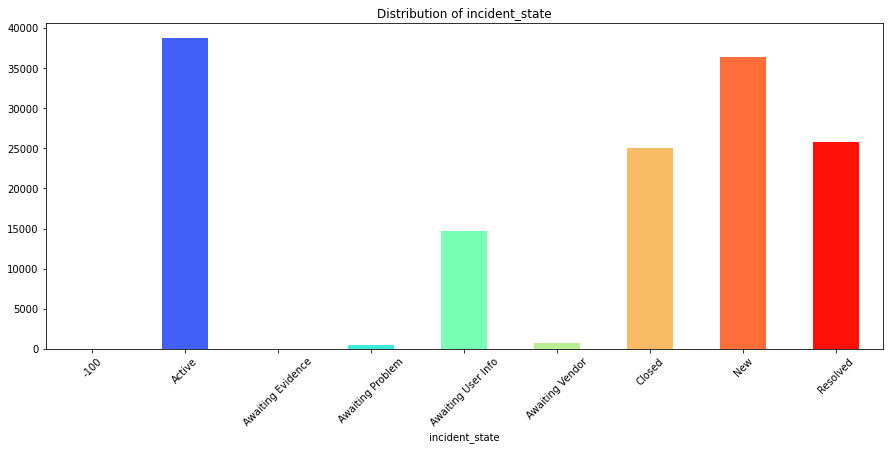

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incident_state, dtype: int64

In [ ]:
# The distribution of incident_state. 
import matplotlib.cm as cm
dataset.groupby('incident_state').count()['number'].plot(kind='bar',
          title='Distribution of incident_state',
          color= cm.rainbow(np.linspace(0, 6)),
          figsize=(15, 6))
plt.xticks(rotation=45)
plt.show()
dataset['incident_state'].value_counts()

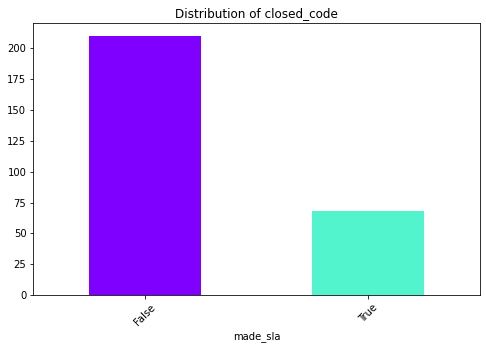

True     15831
False     9154
Name: made_sla, dtype: int64

In [ ]:
# The ratio of SLA satisfactions among the closed cases. 
import matplotlib.cm as cm
case_closed = dataset["incident_state"] == "Closed"
case_closed = dataset[case_closed]
case_closed_reopen = case_closed["reopen_count"] > 0
case_closed_reopen = case_closed[case_closed_reopen]

case_closed['made_sla'].value_counts()
case_closed_reopen['made_sla'].value_counts()
case_closed['u_symptom'].value_counts()
case_closed_reopen['u_symptom'].value_counts()


case_closed_reopen.groupby('made_sla').count()['number'].plot(kind='bar',
          title='Distribution of closed_code',
          color= cm.rainbow(np.linspace(0, 20)),
          figsize=(8, 5))
plt.xticks(rotation = 45) 
plt.show()
case_closed['made_sla'].value_counts()

### **Data Scale**  ###

By performing a box plot, we find the feature values are of different scales, e.g. the sys_mod_count is much higher than others. we may need to do scaling and normalization to make the data feature value fits within a specific scale similar scale. Both cases transform the values of numeric variables so that the transformed data points have specific helpful properties; changing the range of  data in normalization; or  changing the shape of the distribution. 




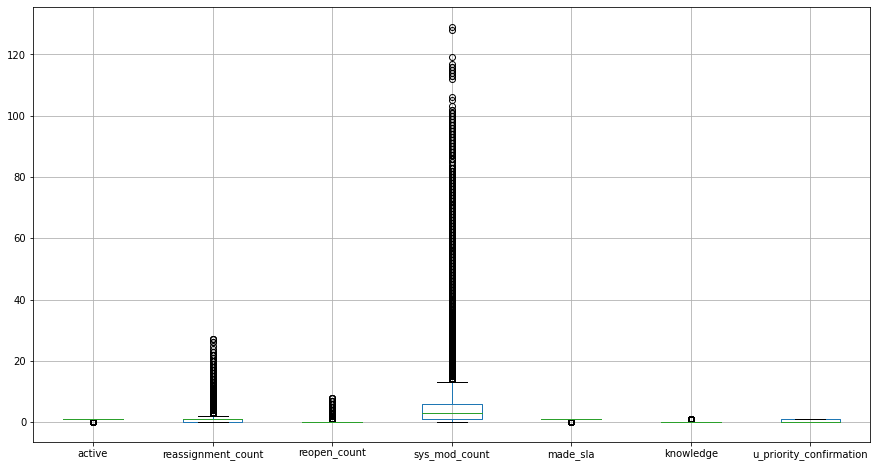

In [ ]:
plt.subplots(figsize=(15,8))
dataeda.boxplot()

### **Correlations / Heatmaps**  ###

We made the heatmap below: each square shows the correlation between variables on each axis. The correlation ranges from -1 to +1. A value close to zero means that there is no linear trend between the two variables. The closer the correlation is to 1, the stronger their positive correlation.

We found other than category and subcategory features, most of the features are more likely close to independent to each other -- as shown in the heatmap, the lower the number and the lighter the color, the lower the correlation between the two variables. The graph is also symmetrical about the diagonal, because the same two variables are paired together in these squares.



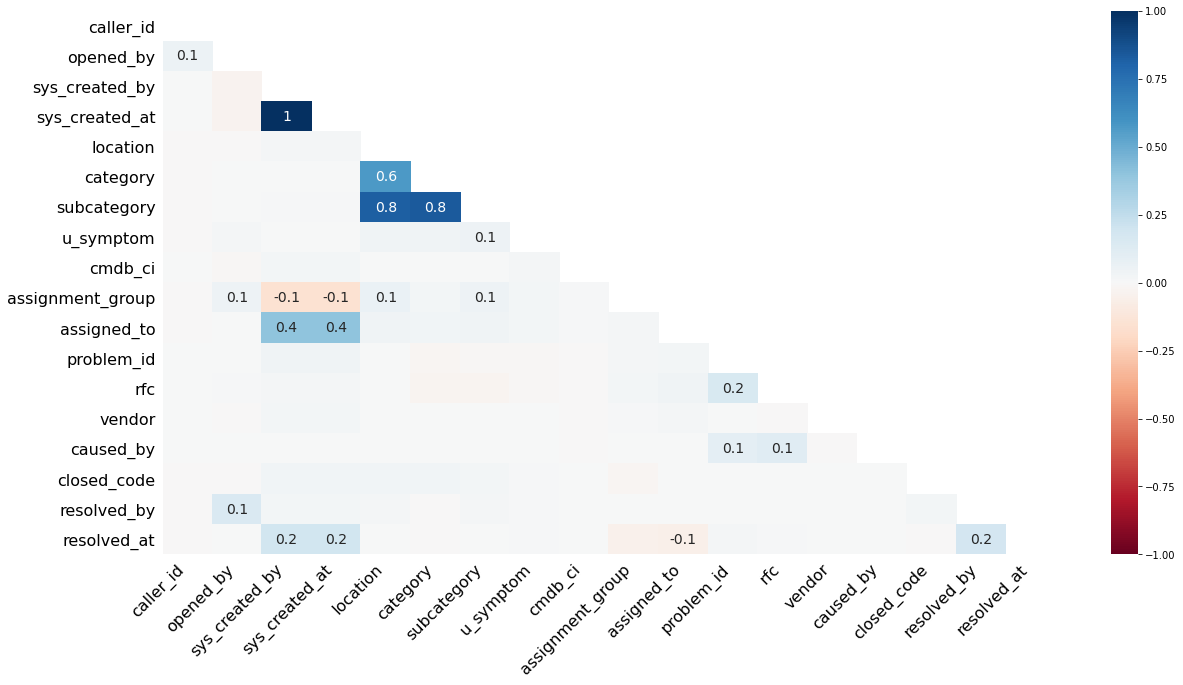

In [ ]:
msno.heatmap(dataeda, figsize=(20,10)  )

In addition to above heatmap, the dendrogram shows more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.  
 

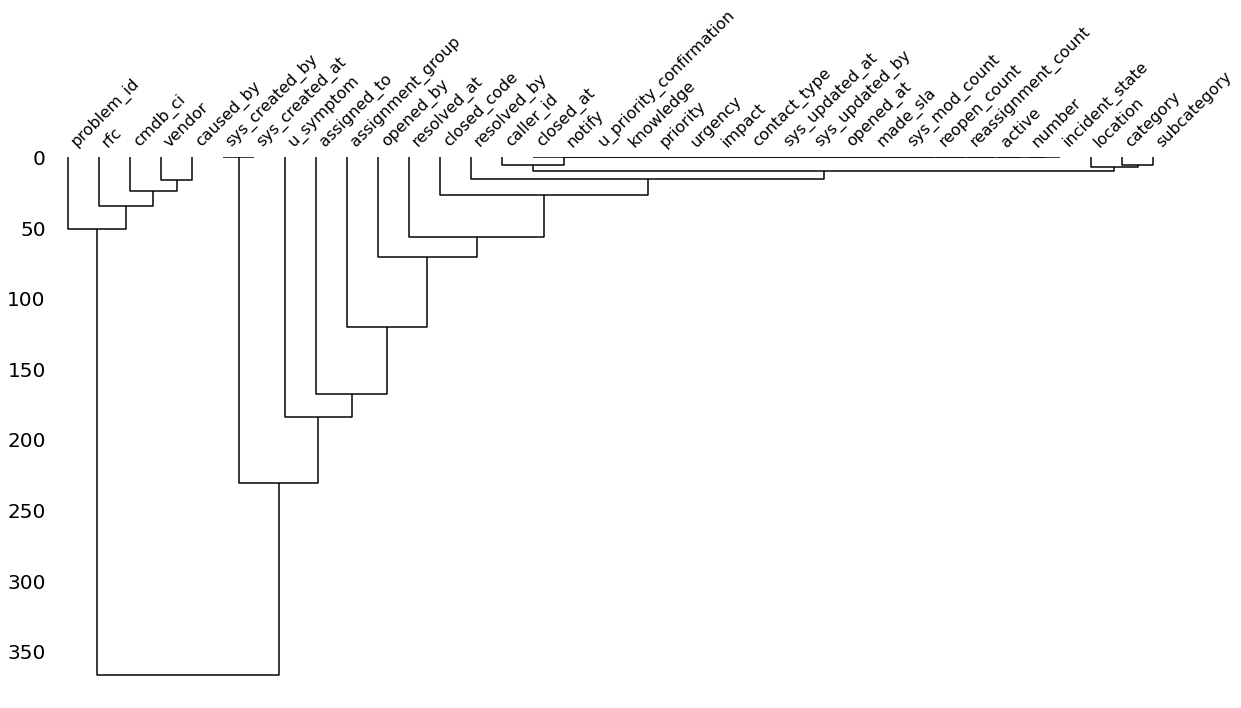

In [ ]:
msno.dendrogram(dataeda, figsize=(20,10)  )

## **Data Preparation and Features Engineering** ##

*At this stage, we have performed some basic data cleansing and preparation; some of the methods will be reevaluated and refined as part of the final submission.*  

### **Data Cleansing** ### 

Based on the EDA/missing values analysis:
1. we drop the features with a significant amount of missing values (over 85% of the entries). 

  *features: problem ID, cmdb_CI, rfc, sys_created_by,sys_created_at,vendor,caused by*
2. we remove the entries with missing values ("?") for the features with an insignificant amount of missing records. 

  *features: category, subcategory, closed code, resolved by, location, caller id*

Based on the EDA/data distribution analysis, we remove the outliers, implementing the following filters:
- incident_state = "Closed"
- contact_type = "Phone"
- priority = "3 - Moderate"
- urgency = "2 - Medium"
- impact = "2 - Medium"
- active = "False"

In [ ]:
# dropping features due to missing values: problem ID, cmdb_CI, rfc, sys_created_by,sys_created_at,vendor,caused by
dataset.drop (columns =["problem_id", "cmdb_ci","rfc", "sys_created_by","sys_created_at","vendor", "caused_by"], inplace=True)
print(f"dataset shape after removing features: {dataset.shape}")

# removing "?" for the following features:category, subcategory, closed code, resolved by,location,caller id
list = ['category','subcategory','closed_code','resolved_by','location','caller_id']
for i in list:
   dataset = dataset[dataset[i] != "?"]
print(f"dataset shape after removing raws: {dataset.shape}")

# filtering by the following values (based on the data distribution and available records):
# *   incident_state = "Closed"
# *   contact_type = "Phone"
# *   priority = "3 - Moderate"
# *   urgency = "2 - Medium"
# *   impact = "2 - Medium"
# *   active = "False"
dataset = dataset[dataset['incident_state'] == "Closed"]
dataset = dataset[dataset['contact_type'] == "Phone"]
dataset = dataset[dataset['priority'] == "3 - Moderate"]
dataset = dataset[dataset['urgency'] == "2 - Medium"]
dataset = dataset[dataset['impact'] == "2 - Medium"]
print(f"dataset shape after filtering: {dataset.shape}")

dataset shape after removing features: (141712, 29)
dataset shape after removing raws: (140655, 29)
dataset shape after filtering: (23119, 29)


### **Features Selection** ###

We select only the features that are expected to be known when the user submits a new ticket.

*features: location,category,subcategory,caller_id,opened_by,assignment_group,assigned_to,u_priority_confirmation*

At this stage, we also removed u_symptom feature due to the significant number of missing values. To be considered in the future steps if it should be used.

In [ ]:
# Preparation of the "limited dataset" - keeping only known features at the time of openning the ticket (excluding 'u_symptom' to avoid data loss)
dataset_ml=dataset[['location','category','subcategory','caller_id','opened_by','assignment_group','assigned_to','u_priority_confirmation','made_sla']]
print(f"dataset_ml shape after features selection: {dataset_ml.shape}")

# removing missing values ("?)
list = ['location','category','subcategory','caller_id','opened_by','assignment_group','assigned_to','u_priority_confirmation','made_sla']
for i in list:
    dataset_ml = dataset_ml[dataset_ml[i] != "?"]
print(f"dataset_ml shape after removing missing values: {dataset_ml.shape}")

# for future exploration - with 19 features
# dataset.drop (columns =['incident_state', 'contact_type','priority', 'urgency','impact','active','opened_at','resolved_at','notify','closed_at', 'made_sla'], inplace=True)

dataset_ml shape after features selection: (23119, 9)
dataset_ml shape after removing missing values: (20067, 9)


As part of the final submission, we would like to explore extending the dataset by adding mean values of some of the durations calculated on the historical data (for example, using tickets that were closed in the previous month, etc.).  While adding features might improve the accuracy, there is a risk of introducing potential bias to the model by separating historical data.  

In [ ]:
# future exploration - adding features

# import warnings
# warnings.filterwarnings('ignore')
 
# dataset['closed_at'] = pd.to_datetime(dataset['closed_at'])
# dataset['opened_at'] = pd.to_datetime(dataset['opened_at'])

# dataset['delta'] = dataset.closed_at - dataset.opened_at
# dataset['processing_time'] = dataset['delta'].dt.total_seconds()/3600
# dataset['processing_time'] = dataset['processing_time'].round(1)

### **Train/Dev/Test Data Preparation** ###

We have defined the predicted variable - "made_SLA," and performed the required data reshaping. In addition, we converted the categorical data to numerical by using the labels encoder to improve the models' performance.
Finally, we prepared the train:dev:test datasets based on the following ratio: 60:20:20.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# split between X & Y
full_X = dataset_ml.drop (columns='made_sla')
full_Y = dataset_ml[['made_sla']]

# convert pd.dataset to np array
full_X.to_numpy()
full_Y.to_numpy()

# convert categorical to numerical
le  = preprocessing.LabelEncoder()
full_Y['made_sla'] = le.fit_transform(full_Y['made_sla'])
full_X['location'] = le.fit_transform(full_X['location'])
full_X['category'] = le.fit_transform(full_X['category'])
full_X['subcategory'] = le.fit_transform(full_X['subcategory'])
full_X['caller_id'] = le.fit_transform(full_X['caller_id'])
full_X['opened_by'] = le.fit_transform(full_X['opened_by'])
full_X['assignment_group'] = le.fit_transform(full_X['assignment_group'])
full_X['assigned_to'] = le.fit_transform(full_X['assigned_to'])
full_X['u_priority_confirmation'] = le.fit_transform(full_X['u_priority_confirmation'])

#adjusting the shape of Y
full_Y=np.ravel(full_Y)

# splitting dataset: train:dev:test - 60:20:20 ratio 
train_data, train_labels = full_X[:12400],full_Y[:12400] 
dev_data, dev_labels = full_X[12401:16053],full_Y[12401:16053]
test_data, test_labels = full_X[16054:20067],full_Y[16054:20067]

print(f"Training data shape {train_data.shape}")
# print(f"Training lables dataset shape {train_labels.shape}")
print(f"Dev data shape {dev_data.shape}")
print(f"Test data shape {test_data.shape}")

Training data shape (12400, 8)
Dev data shape (3652, 8)
Test data shape (4013, 8)


**Additional analysis on the training dataset**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2837aec650>,
      dtype=object)

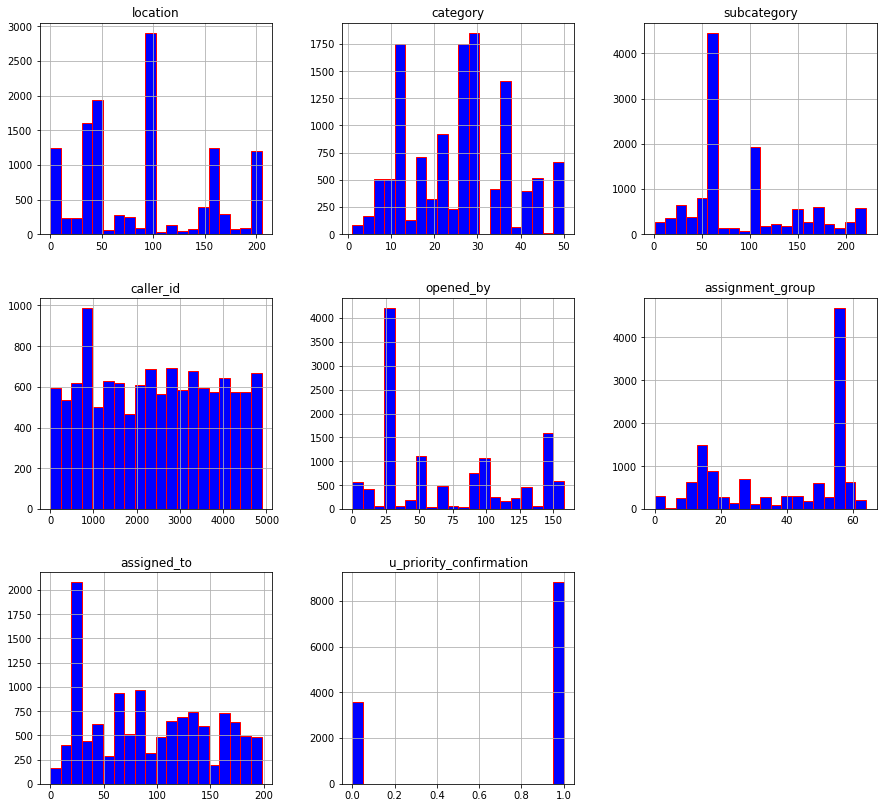

In [ ]:
# training dataset shape
fig = plt.figure(figsize = (15,14))
ax = fig.gca()
train_data.hist(ax = ax, bins = 20, color='b', edgecolor='red')

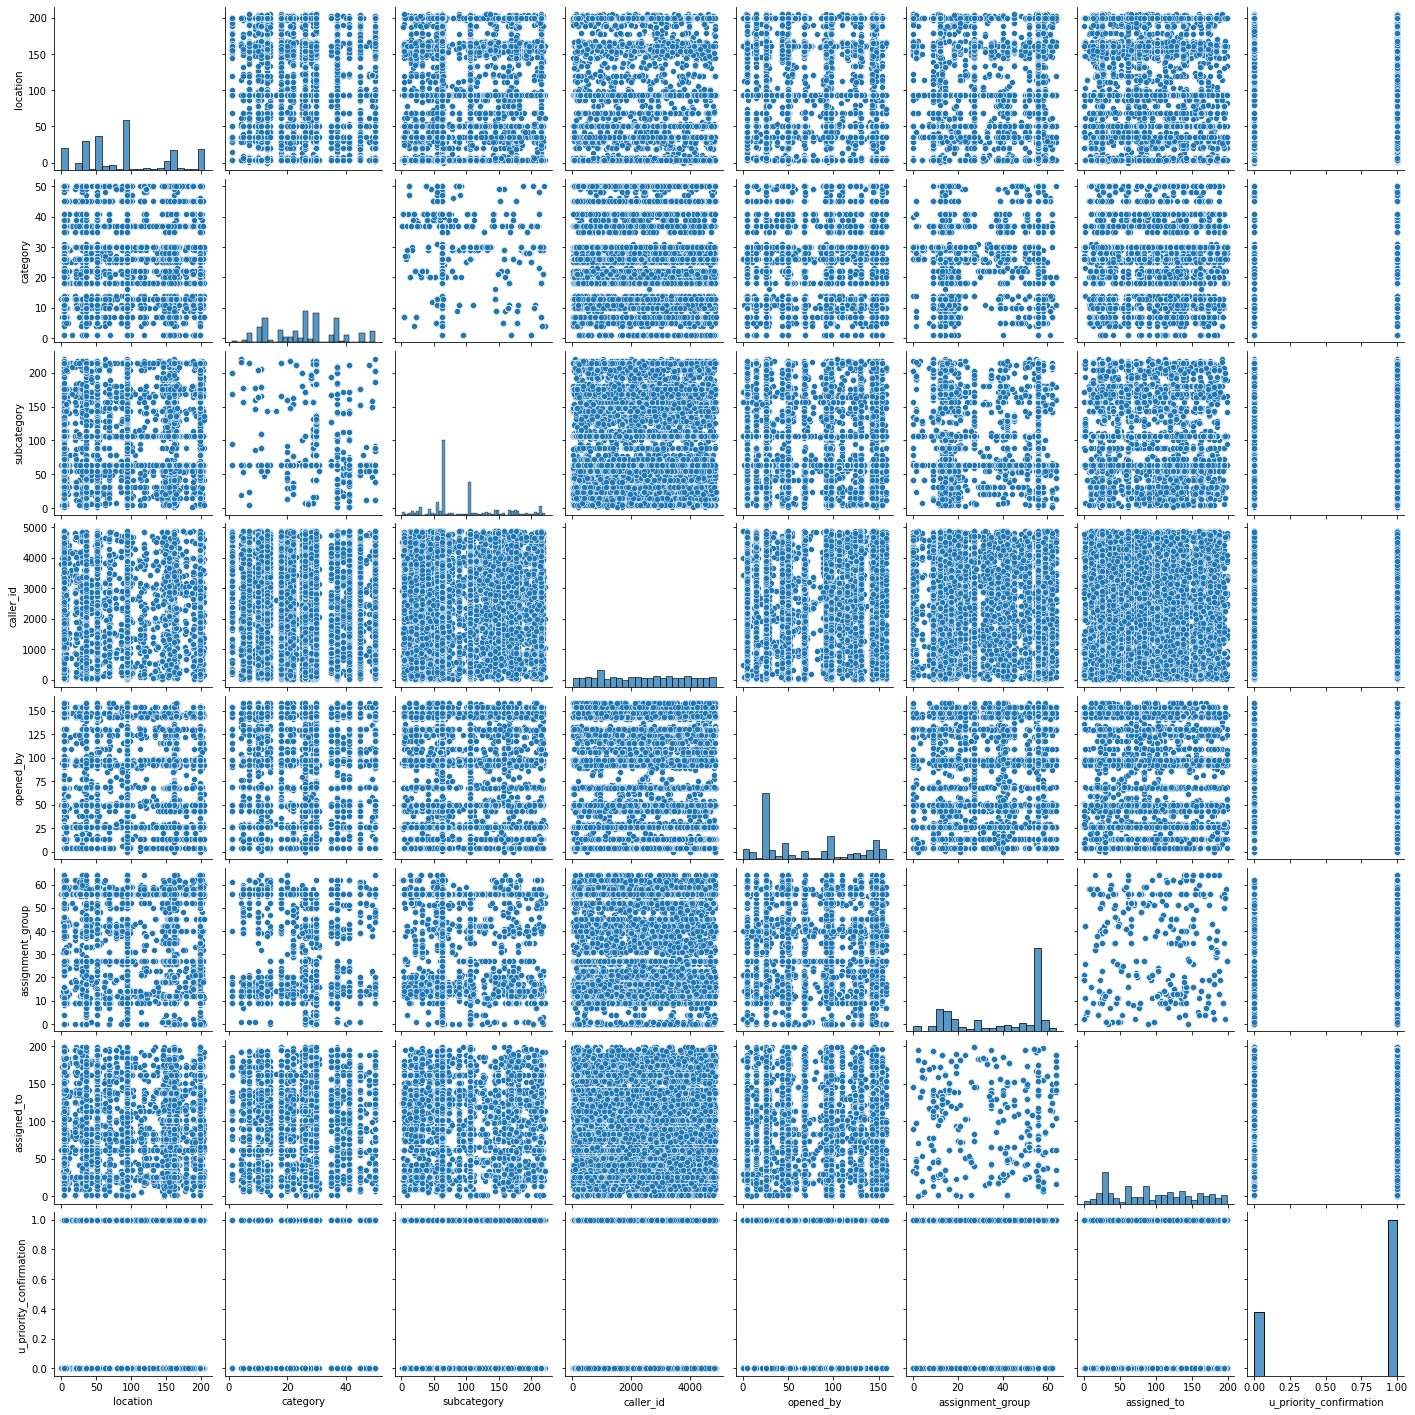

In [ ]:
g = sns.pairplot(train_data)

## **Model Training and Performance Evaluation** ##

### **Overview and Assumptions** ###

The incident dataset, after data cleansing and some feature engineering, consist of 8 features (and one dependent variable `made_sla` with ~20,000 rows of data). The features are not guaranteed to be independent from one and other, and the classification decision boundary is not necessarily linear. Hence k-nn model and decision trees model (with ensemble techniques such as random forest or AdaBoost) may have some advantages in achieving better accuracy than other types of ML models such as Naïve Bayes model and logistic regression. 

Since our dataset mainly consist of text-based categorical data (transformed via numerical encoding), it becomes very challenging for logistic regression to perform well. Some worse performance from certain models could be related to our method of encoding the categorical data, which we will explore further in our “Baseline Check-in and Future work” section.

Our preliminary ML models show accuracies of around 0.7 to 0.8, with Bernoulli Naive Bayes performing surprisingly well at 0.78. Our simple 2-layer neural network can match at similar accuracy, but our tree models seem to be a bit underperform. We will perform more feature engineering and hyperparameter optimization in our future work and we expect improvement of accuracies from these ML models.

### **ML Models** ###

#### KNN ####

In [ ]:
knn_grid_params = {
    'n_neighbors': [*range(1, 30, 1)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
optimize_knn = GridSearchCV(knn(), knn_grid_params, cv = 5, scoring = 'roc_auc')
optimize_knn.fit(train_data, train_labels)
optimize_knn_prediction = optimize_knn.predict(dev_data)
optimize_knn_score = metrics.f1_score(dev_labels, optimize_knn_prediction, average = "weighted")
optimize_knn_accuracy = metrics.accuracy_score(dev_labels, optimize_knn_prediction)
optimize_knn_roc_auc = metrics.roc_auc_score(dev_labels, optimize_knn_prediction)
print("The KNN model has f1-score of {0:.4f}, accuracy of {1:.4f} and Area under "
"the ROC curve of {2:.4f}".format(optimize_knn_score, optimize_knn_accuracy,
                                  optimize_knn_roc_auc))

The KNN model has f1-score of 0.7277, accuracy of 0.7347 and Area under the ROC curve of 0.5935


#### Naive Bayes Model ####

In [ ]:
#Using Naive Bayes

#BernoulliNB 

bnb = BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
bnb.fit(train_data, train_labels)
print ('Using BernoulliNB, sklearn accuracy: %3.2f' %bnb.score(dev_data, dev_labels))

#GaussianNB

alpha = 1
gnb =  GaussianNB(priors=None)
gnb.fit(train_data, train_labels)
print ('Using GaussianNB,  sklearn accuracy: %3.2f' %gnb.score(dev_data, dev_labels))
 


Using BernoulliNB, sklearn accuracy: 0.78
Using GaussianNB,  sklearn accuracy: 0.73


#### Logistic Regression

In [ ]:
logit = LogisticRegressionCV(cv = 5, scoring = 'roc_auc')
logit.fit(train_data, train_labels)
logit_prediction = logit.predict(dev_data)
logit_score = metrics.f1_score(dev_labels, logit_prediction, average = "weighted")
logit_accuracy = metrics.accuracy_score(dev_labels, logit_prediction)
logit_roc_auc = metrics.roc_auc_score(dev_labels, logit_prediction)
print("The Logistic Regression model has f1-score of {0:.4f}, accuracy of {1:.4f} "
"and Area under the ROC curve of {2:.4f}".format(logit_score, logit_accuracy,
                                                 logit_roc_auc))

The Logistic Regression model has f1-score of 0.7057, accuracy of 0.7174 and Area under the ROC curve of 0.5571


#### Random Forest ####

In [ ]:
# Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
n_est= np.arange(200, 600, 100)  
ran_state= np.arange(200, 600, 100)  
acc_max=[]
for i in n_est:
    for j in ran_state:
        random_forrest_model = RandomForestClassifier(n_estimators=i,random_state=j)
        random_forrest_model.fit(train_data, train_labels)
        rf_acc = random_forrest_model.score(dev_data, dev_labels) 
        print("With random forest classifier n_est of ", i, "and ran_state of", j, 
              f"the mean accuracy score is {np.round(rf_acc,3)}") 
        acc_max.append(rf_acc)    
        #print(acc_max)
max  = np.max(acc_max)
print(f"With random forest classifier, the mean accuracy score is {np.round(max,3)}") 


With random forest classifier n_est of  200 and ran_state of 200 the mean accuracy score is 0.764
With random forest classifier n_est of  200 and ran_state of 300 the mean accuracy score is 0.761
With random forest classifier n_est of  200 and ran_state of 400 the mean accuracy score is 0.761
With random forest classifier n_est of  200 and ran_state of 500 the mean accuracy score is 0.766
With random forest classifier n_est of  300 and ran_state of 200 the mean accuracy score is 0.763
With random forest classifier n_est of  300 and ran_state of 300 the mean accuracy score is 0.766
With random forest classifier n_est of  300 and ran_state of 400 the mean accuracy score is 0.761
With random forest classifier n_est of  300 and ran_state of 500 the mean accuracy score is 0.765
With random forest classifier n_est of  400 and ran_state of 200 the mean accuracy score is 0.766
With random forest classifier n_est of  400 and ran_state of 300 the mean accuracy score is 0.764
With random forest c

#### Adaboost ####

In [ ]:
# How to tune adaboost decision tree
# https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20
ada_grid_params = {"base_estimator__criterion" : ["gini", "entropy"],
                   "base_estimator__splitter" :   ["best", "random"],
                   "base_estimator__max_depth": [1, 2, 3],
                   "learning_rate": [0.01, 0.1, 1.0],
                   "n_estimators": [10, 50, 100]
                   }

# use the default decision tree classifier as based estimator
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(dt)
optimize_ada = GridSearchCV(ada, ada_grid_params, cv = 5, scoring = 'roc_auc')
optimize_ada.fit(train_data, train_labels)
optimize_ada_prediction = optimize_ada.predict(dev_data)
optimize_ada_score = metrics.f1_score(dev_labels, optimize_ada_prediction, average = "weighted")
optimize_ada_accuracy = metrics.accuracy_score(dev_labels, optimize_ada_prediction)
optimize_ada_roc_auc = metrics.roc_auc_score(dev_labels, optimize_ada_prediction)
print("The AdaBoost Decision Tree model has f1-score of {0:.4f}, accuracy of {1:.4f} "
"and Area under the ROC curve of {2:.4f}".format(optimize_ada_score, optimize_ada_accuracy,
                                                 optimize_ada_roc_auc))

The AdaBoost Decision Tree model has f1-score of 0.7465, accuracy of 0.7552 and Area under the ROC curve of 0.6159


#### Neural Network ####

In [ ]:
#Tensorflow approach 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import to_categorical


numTrainExamples = train_data.shape[0]
numTestExamples = test_data.shape[0]

print ('Train set = %d' %(numTrainExamples))
print ('Test set = %d' %(numTestExamples))

 
model = Sequential() 
model.add(Dense(1, input_dim=8, activation='softmax')) 
 
## Cost function & Objective (and solver)
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
H = model.fit(train_data, train_labels, shuffle=False, batch_size=numTrainExamples, verbose=0, epochs=500) 
print ('Train time = %.2f' %(time.time() - start_time))
score = model.evaluate(dev_data, dev_labels, verbose=0) 

print('Test score:', score) 
print('Test accuracy:', score[1])

 

Train set = 12400
Test set = 4013
Train time = 3.11
Test score: [0.0, 0.7768346071243286]
Test accuracy: 0.7768346071243286


## **Baseline Check-in and Future Work** ##

Here is what we want to address in our future work in this Final project:


*   Encoding of categorical data

 The incident dataset mainly consists of categorical data which the relationship between each categorical value is not known. For example, for feature `assignment_group`, it is not known whether the company put similar IT support groups under the same manager or location into adjacent group numbers (i.e. Group 10, 11 and 12 are under the same manager). For simplicity we have decided to use `LabelEncoder()` which transforms categorical data to ordinal values, but may introduce relationship between categorical data that doesn’t necessarily exist in the first place. We also considered to use `OneHotEncoder()` instead but that would increase our feature space size a lot (~6,000+) and make our dataset quite sparse (since we only have ~20,000 rows of data). That is mainly due to categorical features such as `caller_id` has many distinct values (different users submitting incident tickets). 
To improve the encoding, we are considering deploying hashing to these categorical features. Hashing would transform these categorical data into binary set (hence no relationship between categorical values), but only to a limited, pre-defined feature size. Collision could occur for hashing these ctegorical features, but this actually acts as a form of regularizatoin to reduce the influence of rare feature values over the eventual weights of our trained models.


*   Splitting of train, dev and test set

 Splitting of train, dev and test set
We simply split our dataset into train, dev and test set by indexing the original dataset as it is. However, we would like to ensure the train, dev and test set have the same distribution. To do this, we will randomly shuffle our data set before splitting them into train/dev/test dataset.

*	Optimize hyperparameters and Cross-Validation
 
 Some of our ML models did not use the `GridSearchCV` method to optimize hyperparameters with cross-validation using a 5-fold split of training set. In our next few iteration, we would like to explore more on how to optimize the hyperparameters and experiment the impact of various metrics with different cross-validation split

*   Use of Neural Networks models

 We also want to explore further into usage of neural networks that may generate combinations of features by feature extraction from the categorical data from our incident dataset. To achieve that, we may need to explore deeper neural network (4+ layers) and fine-tune the hyperparameters/options such as batch size, activation function, number of hidden layers, loss function, and epoch...etc. Currently our 2-layer NN perform worse than our random forest/Adaboost decision tree models, but we expect we can improve the NN model further by exploring these hyperparameters/options.

*   Imputation of missing value

 In the final version, we will consider imputation the missing values, i.e., substituting the missing data by some statistical methods.  such as imputation by Mean/Mode/Median. If the missing values in a column or feature are numerical, the values can be imputed by the mean of the complete cases of the variable.  Or, K-Nearest Neighbour Imputation (KNN) This method uses k-nearest neighbour algorithms to estimate and replace missing data.

*   milestones in the process

 We found that in the incident handling process, several landmark points in time existing in between the case open and case close time, they are system creation, system update and case resolution. We will use these key time points as markers to feature and reason about the progress of incident resolution and whether the SLA can be reached.


## **References** ##

[1] Enhancing Completion Time Prediction Through Attribute Selection, Claudio A. L. AmaralMarcelo FantinatoEmail authorHajo A. ReijersSarajane M. Peres, 28 February 2019 ([Link](https://https://link.springer.com/chapter/10.1007%2F978-3-030-15154-6_1))

[2] Predict IT Support Tickets with Machine Learning and NLP, Garret Eichhon, 20 April, 20202 ([link](https://towardsdatascience.com/predict-it-support-tickets-with-machine-learning-and-nlp-a87ee1cb66fc))

TBD


